Attempt at finding clusters in the events of GENIE16_CH datasets

In [1]:
import mhn
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns

import checkpoints_mbonart as cp
import EventDistanceMeasurer as edm

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(999)
file_names=["G16_CH_BLCA_Events.csv", "G16_CH_COAD_Events.csv", "G16_CH_LUAD_Events.csv", "G16_CH_MEL_Events.csv", "G16_CH_PRAD_Events.csv"]
file_path=os.path.join( os.getcwd(), '..','data', file_names[2] )
input = pd.read_csv(file_path)
events=list(input.columns)[1:]
print(events)


['TP53 (M)', 'MCL1/1q (Amp)', 'TERT/5p (Amp)', 'KRAS (M)', 'CDKN2A/9p (Del)', 'MYC/8q (Amp)', 'EGFR/7p (Amp)', 'EGFR (M)', 'EPHA7/6q (Del)', 'BCL2/18q (Del)', 'RB1/13q (Del)', 'STK11 (M)', 'RBM10 (M)', 'KEAP1 (M)', 'SMARCA4 (M)', 'NF1 (M)', 'ATM (M)', 'PIK3CA (M)', 'BRAF (M)', 'ARID1A (M)', 'FAT1 (M)', 'SETD2 (M)', 'MET (M)', 'RB1 (M)', 'ERBB2 (M)', 'SMAD4 (M)', 'KMT2D (M)', 'ARID2 (M)', 'APC (M)', 'ATRX (M)', 'CH']


In [3]:
cp.FORCE_EXECUTE_COMPUTATIONS=True
dist_measurer = edm.EventDistanceMeasurerCP(events[0:3],events[3:])
dist_measurer.load_data(input)
dist_measurer.train_All_MHNs(pick_1se=True)

0x1.50acc87c6c830p+62
Directory for storage is edm_50acc87c6c830
0.0038684769540751054
    Lambda Value  Mean Score  Standard Error
0       0.000039   -1.945177        0.005420
1       0.000065   -1.945313        0.005449
2       0.000108   -1.945438        0.005435
3       0.000180   -1.945555        0.005392
4       0.000300   -1.945837        0.005292
5       0.000500   -1.946414        0.005182
6       0.000833   -1.947672        0.005004
7       0.001390   -1.949596        0.004950
8       0.002319   -1.950020        0.004973
9       0.003868   -1.950455        0.005051
10      0.006453   -1.951745        0.005136
11      0.010764   -1.954939        0.005386
12      0.017956   -1.961291        0.005835
13      0.029952   -1.972485        0.006471
14      0.049963   -1.974569        0.006295
15      0.083344   -1.974569        0.006295
16      0.139026   -1.974490        0.006303
17      0.231909   -1.974510        0.006319
18      0.386847   -1.974510        0.006319
training MHN 

get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x0000020C85396F20>


C:\Users\michi\AppData\Local\Temp\ipykernel_23992\1286430719.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [113.75, 113.75, 152.5, 152.5],
  [95.0, 95.0, 133.125, 133.125],
  [85.0, 85.0, 114.0625, 114.0625],
  [75.0, 75.0, 99.53125, 99.53125],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [87.265625, 87.265625, 184.375, 184.375],
  [65.0, 65.0, 135.8203125, 135.8203125],
  [42.5, 42.5, 100.41015625, 100.41015625],
  [25.0, 25.0, 71.455078125, 71.455078125],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [235.0, 235.0, 260.0, 260.0],
  [225.0, 225.0, 247.5, 247.5],
  [48.2275390625, 48.2275390625, 236.25, 236.25],
  [15.0, 15.0, 142.23876953125, 142.23876953125],
  [5.0, 5.0, 78.619384765625, 78.619384765625]],
 'dcoord': [[0.0, 1.3

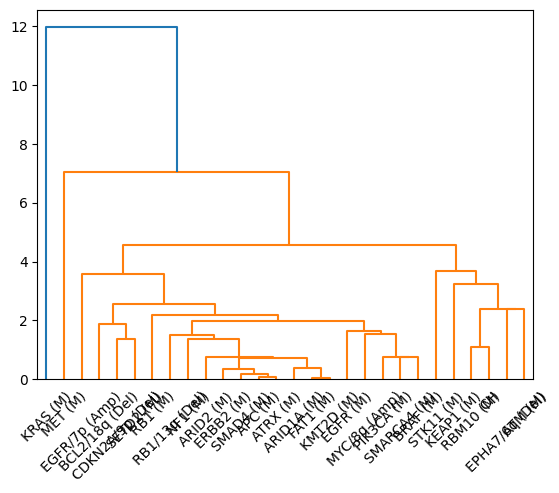

In [4]:
dist_measurer.compute_distance_matrix(edm.DIST.OFFDIAG_EUCLID)
linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)
scipy.cluster.hierarchy.dendrogram(linkage, labels= [f"{ev}" for ev in dist_measurer._events])

<Axes: >

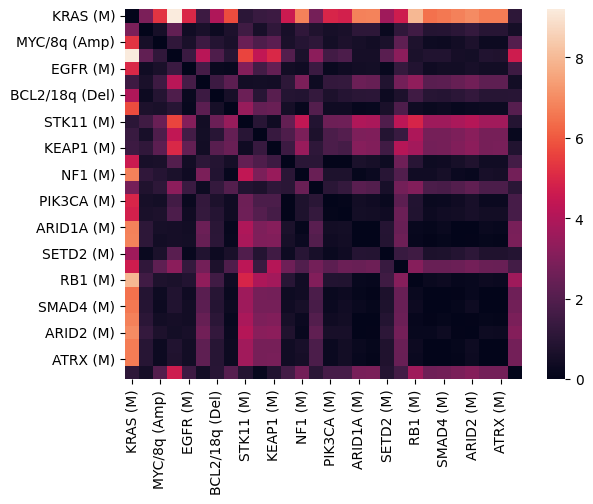

In [5]:
sns.heatmap(dist_measurer._dist_mat)


[[-0.07 -0.72 -0.39  0.  ]
 [-0.45 -0.46 -0.    0.  ]
 [-0.07 -0.   -0.59  0.  ]
 [ 0.    0.    0.    0.  ]]


(<matplotlib.image.AxesImage at 0x20c87918c50>,
 <matplotlib.colorbar.Colorbar at 0x20c855cf5c0>)

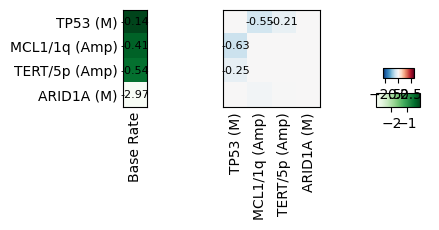

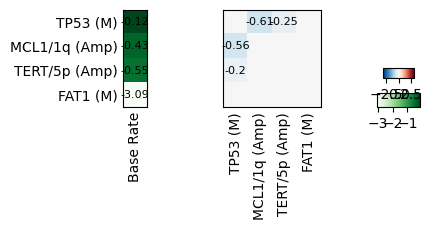

In [6]:
print(dist_measurer._init_theta)

#dist_measurer._mhns['RB1 (M)'].plot()
#dist_measurer._mhns['ERBB2 (M)'].plot()


dist_measurer._mhns['ARID1A (M)'].plot()
dist_measurer._mhns['FAT1 (M)'].plot()

0.0038684769540751054
0.00038684719535783365


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\model.py:570: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(


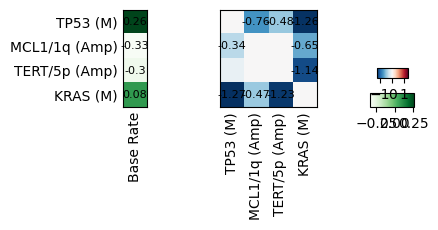

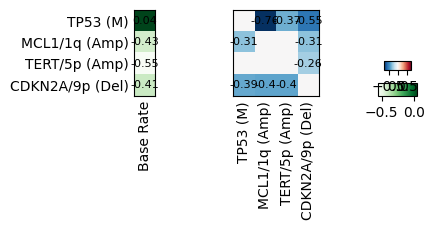

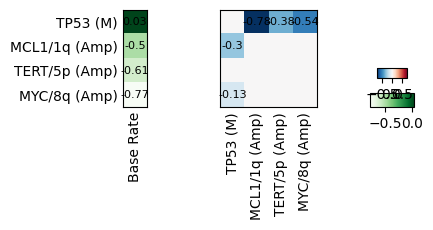

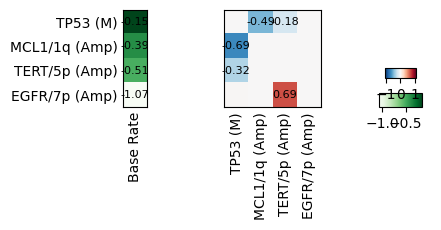

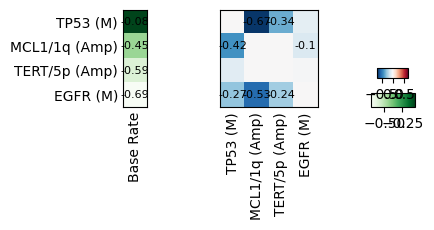

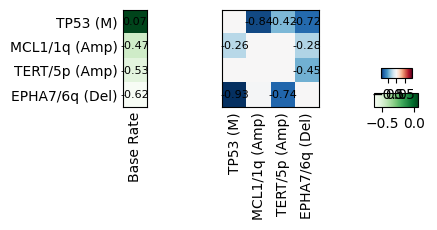

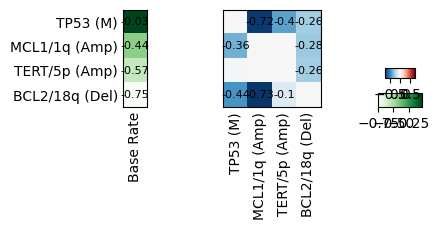

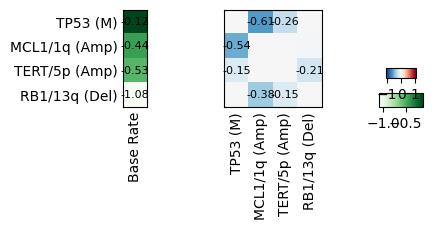

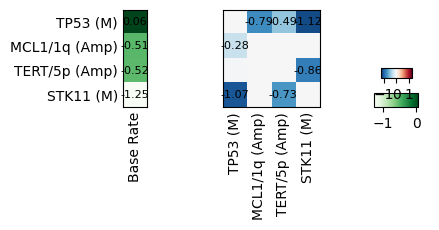

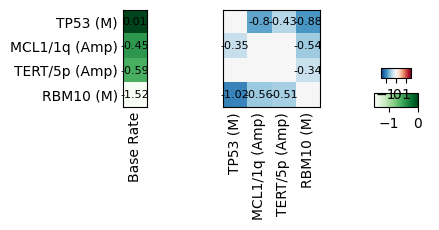

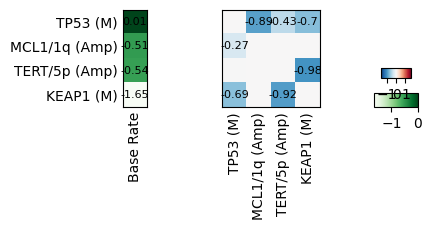

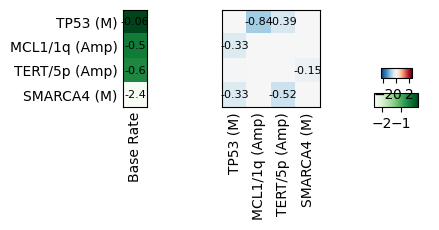

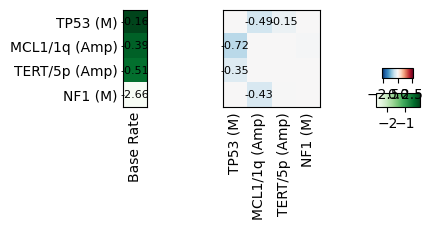

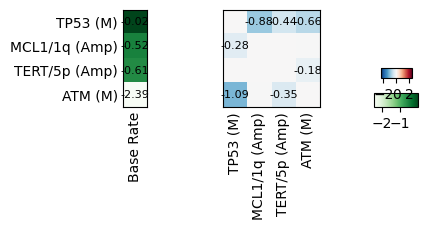

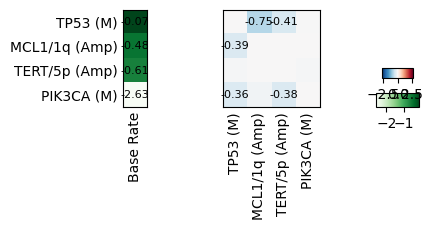

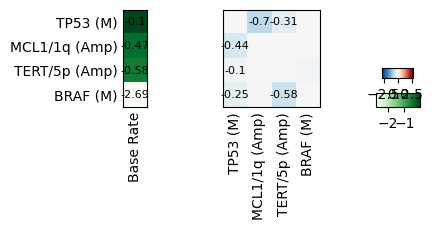

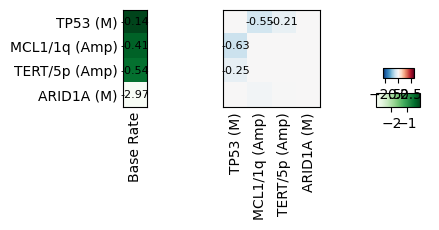

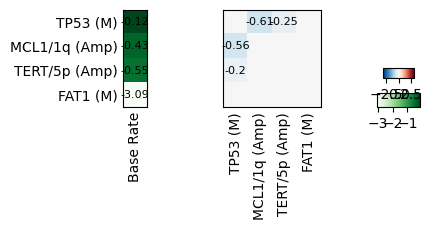

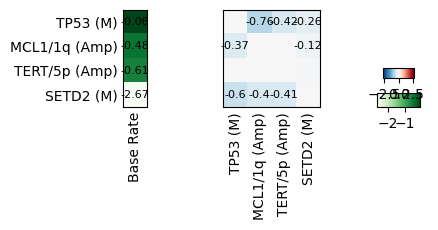

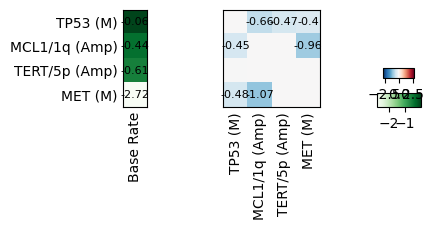

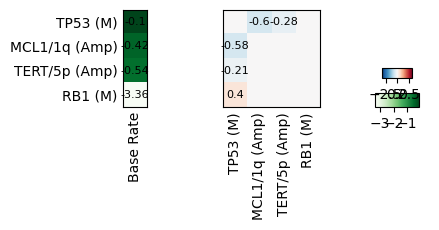

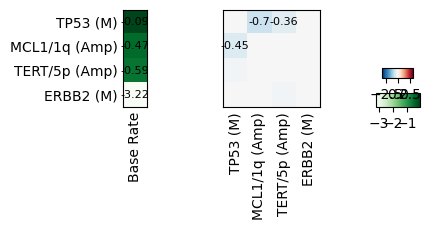

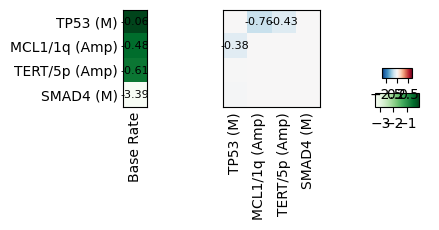

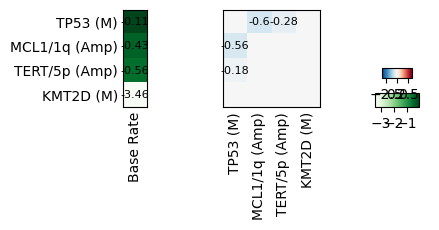

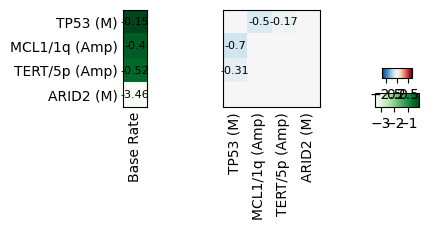

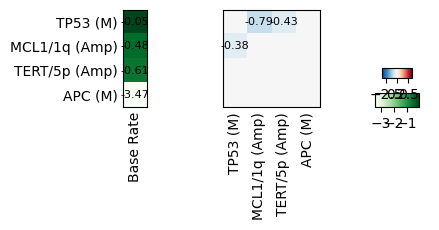

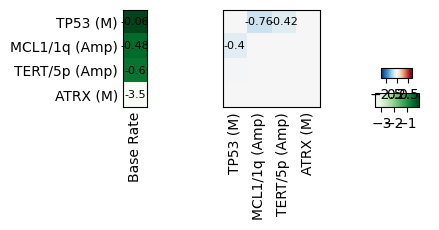

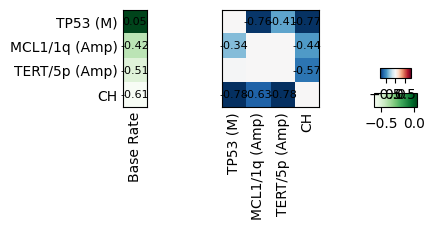

In [7]:
print(dist_measurer._lam_test)
print(1/len(input))

for ev in dist_measurer._events:
    dist_measurer._mhns[ev].plot()